### Please install the required Python modules/SDKs

In [19]:
# ! activate ai-azure-c1

import sys

# sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

### This project uses the latest pillow package to show the rectangular bounding box around the face, so please upgrade the pillow package using the command below:

In [20]:
!pip install Pillow==8.4

You should consider upgrading via the 'c:\users\gachanja\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


## Importing Useful Python Libraries or Packages 

In [21]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person


import matplotlib.pyplot as plt

## Utility Functions

In [22]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [23]:
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()

In [24]:
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [25]:
def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 5)
    return img

## Accessing Specific Azure Resources 

In [26]:
KEY = "8fd869cdf2a843659f7c7cdd20dbef52"
ENDPOINT = "https://extractface.cognitiveservices.azure.com/"

In [27]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [28]:
face_client.api_version

'1.0'

## Setting up Input Data

### Replace image URL here
* You can use your own images by replacing the image URL.

In [29]:
face_image = "https://raw.githubusercontent.com/AndyBurn/Azure_AI/main/step_2/ID_Text_Extraction/Digital_IDs/Edited_Digital_IDs/Alex_Gachanja_ID-01-01.png"

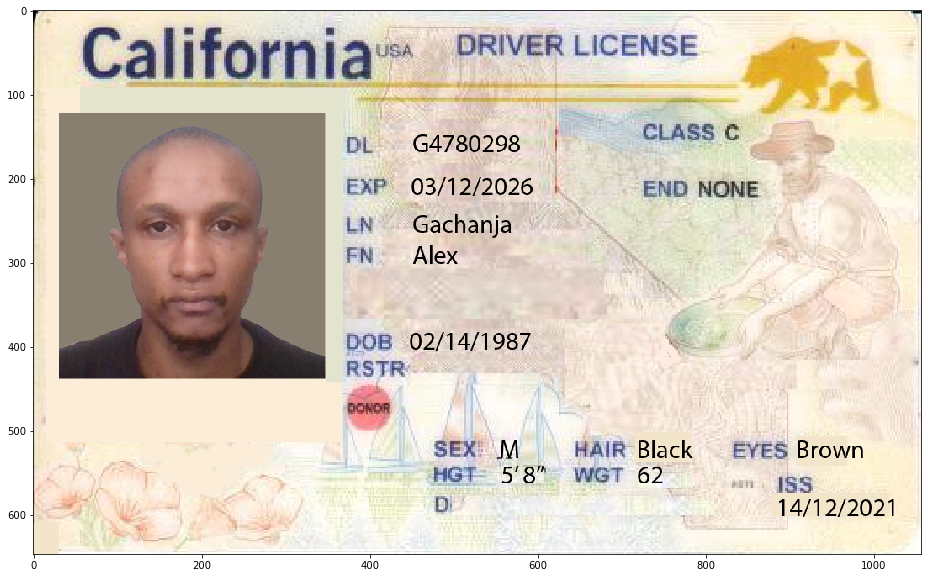

In [30]:
show_image_in_cell(face_image)

In [31]:
selected_image = face_image

## Face Detection Functions Using Azure Face Service Python SDK

In [32]:
# Detect Face from an image
def detect_face_from_any_url(selected_image):
    detected_faces = face_client.face.detect_with_url(url=selected_image, detection_model='detection_03')
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(single_image_name))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [33]:
def list_all_faces_from_detected_face_object(detected_faces_object):
    print('We found total {} face(s) in selected face detected object.'.format(str(len(detected_faces_object))))
    for face in detected_faces_object: 
        print (face.face_id)

## Detecting faces from the input source image

In [34]:
detected_faces_object = detect_face_from_any_url(selected_image)

Total face(s) detected  from 1


In [35]:
list_all_faces_from_detected_face_object(detected_faces_object)

We found total 1 face(s) in selected face detected object.
cb276562-fc9a-44ec-8674-90fe0a620638


## Showing bounding box around the detected face

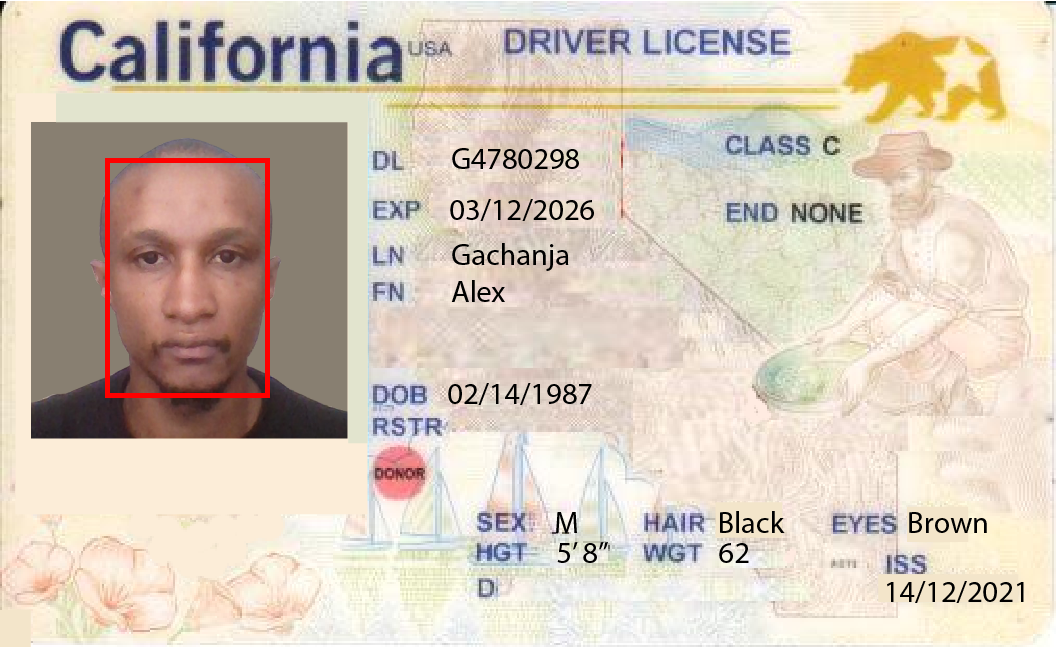

In [36]:
drawFaceRectangles(selected_image, detected_faces_object)